In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():


/kaggle/input/my-spotify/dataset.csv


# Значение полей таблицы Spotify
- id: уникальный идентификатор трека.
- name: название трека.
- artists: список исполнителей, записанных как строки или массив строк.
- album: альбом, к которому относится трек (может содержать также дополнительные метаданные альбома).

- duration_ms: продолжительность трека в миллисекундах.
- explicit: булевое значение, обозначающее наличие ненормативной лексики («True» — эксплицитный контент, «False» — нет).
- popularity: индекс популярности трека от 0 до 100.
- track_number: порядковый номер трека в альбоме.
- is_local: булево значение, определяющее, является ли файл локальным (не доступным онлайн)
- danceability: шкала от 0 до 1, характеризующая насколько удобно танцевать под этот трек (больше значений соответствуют более ритмичным композициям).
- energy: энергия трека (например, громкость, темп, интенсивность звучания); значения варьируются от 0 до 1.
- loudness: средняя громкость трека в децибелах (обычно отрицательные числа, близкие к нулю означают высокую громкость).
- mode: мажор/минор (мажорный режим = 1, минорный = 0).
- speechiness: степень разговорности трека (чем ближе к единице, тем больше речь воспринимается как доминирующий элемент).
- acousticness: акустичность музыки (оценивается вероятность отсутствия электронной обработки звука).
- instrumentalness: оценка инструментальности (1 означает отсутствие вокала, близость к 0 свидетельствует о наличии голоса).
- liveness: оценка живого исполнения (при значениях близких к 1 высока вероятность записи концерта).
- valence: эмоциональная окраска мелодии (отражает позитивность настроения).
- tempo: средний темп композиции в ударах в минуту (BPM).
- time_signature: музыкальный размер (например, 4/4, 3/4 и др.).
- track_genre: жанр трека
- key: тоновая основа композиции (от 0 до 11 соответствует нотам C, C#, D... B).


In [3]:
df  = pd.read_csv('/kaggle/input/my-spotify/dataset.csv')
df.head()



,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Узнаю сколько пропусков

In [5]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

К счастью пропусков не так много. Сразу же их заполню

In [6]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Все пропуски в одном треке удаляю его (один трек ценности не несёт)

In [7]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Удалю столбец "Unnamed: 0" - он не несет никакой ценности для статистики

In [8]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Удалю другие ненужные поля:
- track_id,не несёт смысла для статистики
- time_signature


In [10]:
df.drop('track_id', axis=1, inplace=True)
df.drop('time_signature', axis=1, inplace=True)




Добавлю колонку времени трека в минутах

In [11]:
df['duration_min'] = df['duration_ms'] / 60000

In [11]:
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,duration_min
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic,3.844433
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic,2.493500
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic,3.513767
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic,3.365550
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic,3.314217


# Теории

# 1. Популярность зависит от жанра 

In [12]:
genre_popularity_mean = df.groupby('track_genre')['popularity'].mean()
print(genre_popularity_mean)#сгруппировал две нужные колонки

track_genre
acoustic       42.483
afrobeat       24.399
alt-rock       33.943
alternative    24.337
ambient        44.191
                ...  
techno         39.042
trance         37.635
trip-hop       34.460
turkish        40.698
world-music    41.873
Name: popularity, Length: 114, dtype: float64


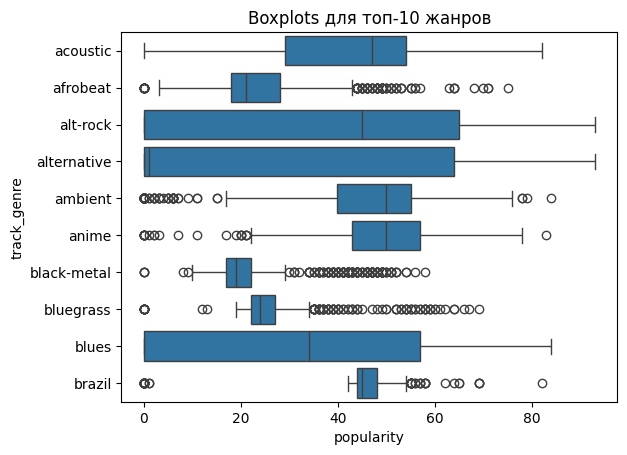

In [14]:
top_genres = df['track_genre'].value_counts()[:10].index  # Оставляем только топ-10 жанров
filtered_df = df[df['track_genre'].isin(top_genres)]
sns.boxplot(x='popularity', y='track_genre', data=filtered_df)
plt.title('Boxplots для топ-10 жанров')
plt.show()

Pop и power-pop наиболее популярные жанры с неплохим отрывом. Следовательно теория верна. Жанр дейстаительно влияет на популярность трека на площадке. Ведь часто люди ищут определенный жанр.

# 2. Популярность зависит от наличия нецензурной лексики

In [15]:
# Подсчет количества треков с нецензурной лексикой
explicit_count = df[df['explicit'] == True].shape[0]

# Подсчет количества треков без нецензурной лексики
non_explicit_count = df[df['explicit'] == False].shape[0]

# Вывод результатов
print(f"Количество треков с нецензурной лексикой: {explicit_count}")
print(f"Количество треков без нецензурной лексики: {non_explicit_count}")

Количество треков с нецензурной лексикой: 9747
Количество треков без нецензурной лексики: 104252


In [16]:
mean_popularity_explicit = df[df['explicit'] == True]['popularity'].mean()
mean_popularity_non_explicit = df[df['explicit'] == False]['popularity'].mean()

print(f"Средняя популярность треков с нецензурной лексикой: {mean_popularity_explicit:.2f}")
print(f"Средняя популярность треков без нецензурной лексики: {mean_popularity_non_explicit:.2f}")

Средняя популярность треков с нецензурной лексикой: 36.45
Средняя популярность треков без нецензурной лексики: 32.94


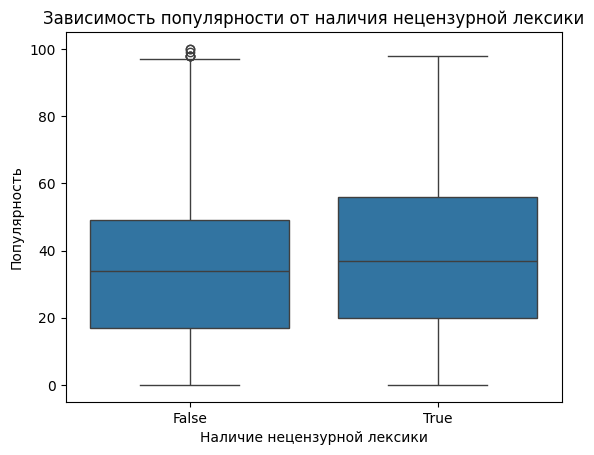

In [17]:
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title('Зависимость популярности от наличия нецензурной лексики')
plt.xlabel('Наличие нецензурной лексики')
plt.ylabel('Популярность')
plt.show()

Теория не подтвердилась. Популярность не сильно зависит от нецензурной лексики. Разница есть, но скорее всего наличие нецензурной лексики это второстепенный критерий для слушателя.

# 3. Популярность зависит от длительности.
Вполне вероятно, что длительность играет немалую роль. Многие не хотят слушать длинные произведения.

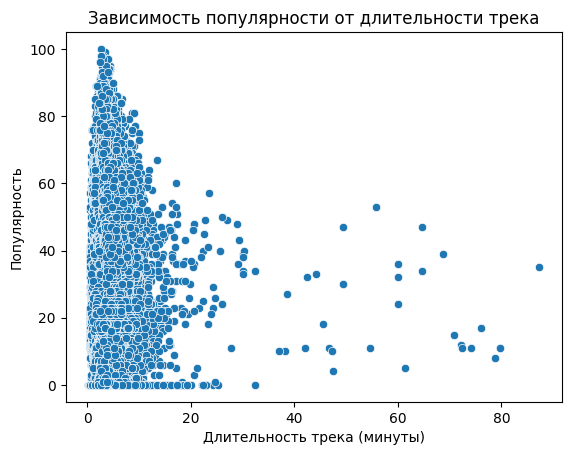

Коэффициент корреляции: -0.01


In [18]:
# Преобразование длительности треков из миллисекунд в минуты
df['duration_min'] = df['duration_ms'] / 60000

# Визуализация
sns.scatterplot(x='duration_min', y='popularity', data=df)
plt.title('Зависимость популярности от длительности трека')
plt.xlabel('Длительность трека (минуты)')
plt.ylabel('Популярность')
plt.show()

# Корреляционный анализ
correlation = df['duration_min'].corr(df['popularity'])
print(f"Коэффициент корреляции: {correlation:.2f}")

Теория не подтвердилась. Корреляция слишком мала, чтобы счситать её значимой.

# 4. Уровень инструментальность трека может влиять на популярность
Кто-то предпочитает просто музыку без слов для заднего фона. (Ambient к примеру)


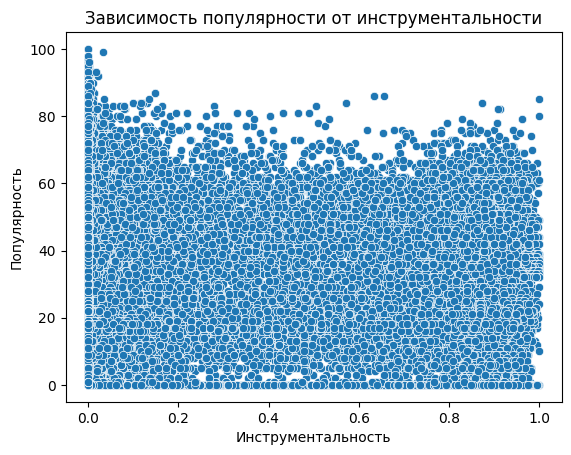

Коэффициент корреляции: -0.10


In [19]:
sns.scatterplot(x='instrumentalness', y='popularity', data=df)
plt.title('Зависимость популярности от инструментальности')
plt.xlabel('Инструментальность')
plt.ylabel('Популярность')
plt.show()

# Корреляционный анализ
correlation = df['instrumentalness'].corr(df['popularity'])
print(f"Коэффициент корреляции: {correlation:.2f}")

Теория подтвердилась. Корреляция есть. Чем выше доля вокала - тем ниже популярность (не сильная зависимость, но она есть)

# 5. Популярность зависит от танцевальности?
Гипотеза в том, что танцевальность музыки влияет на популярность ведь её чаще используют в клубах или вечеринках -> больше аудитория -> больше распространения -> выше популярность

/tmp/ipykernel_55/2140251190.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='danceability', y='popularity', cmap='Blues', shade=True)


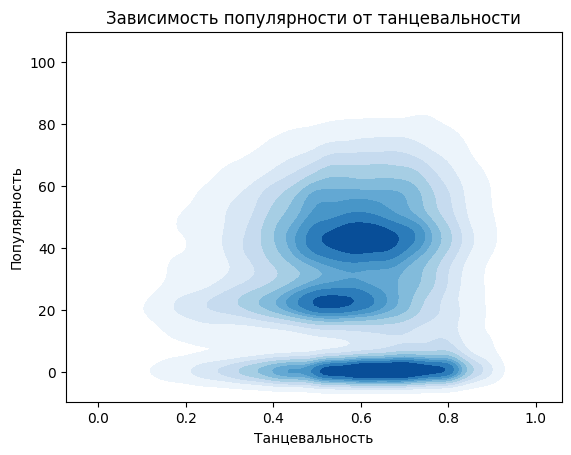

In [20]:
sns.kdeplot(data=df, x='danceability', y='popularity', cmap='Blues', shade=True)
plt.title('Зависимость популярности от танцевальности')
plt.xlabel('Танцевальность')
plt.ylabel('Популярность')
plt.show()

In [24]:
correlation = df['danceability'].corr(df['popularity'])
print(f"Коэффициент корреляции: {correlation:.2f}")

Коэффициент корреляции: 0.04


Теория подтвердилась. Корреляция есть - чем выше танцевальность, тем выше популярность.

# Корреляция колонок

In [25]:
df2 = df.select_dtypes(include = 'number').corr()
df2

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
popularity,1.000000,-0.007129,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,-0.007129
duration_ms,-0.007129,1.000000,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,1.000000
danceability,0.035444,-0.073435,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,-0.073435
energy,0.001053,0.058520,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.058520
key,-0.003847,0.008123,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.008123
loudness,0.050420,-0.003475,0.259076,0.761690,0.038591,1.000000,-0.041768,0.060826,-0.589804,-0.433478,0.076897,0.279851,0.212447,-0.003475
mode,-0.013948,-0.035581,-0.069224,-0.078365,-0.135911,-0.041768,1.000000,-0.046535,0.095568,-0.049961,0.014004,0.021964,0.000572,-0.035581
speechiness,-0.044930,-0.062605,0.108625,0.142508,0.020419,0.060826,-0.046535,1.000000,-0.002184,-0.089617,0.205218,0.036637,0.017274,-0.062605
acousticness,-0.025458,-0.103770,-0.171531,-0.733908,-0.040942,-0.589804,0.095568,-0.002184,1.000000,0.104033,-0.020693,-0.107081,-0.208231,-0.103770
instrumentalness,-0.095147,0.124364,-0.185608,-0.181880,-0.006821,-0.433478,-0.049961,-0.089617,0.104033,1.000000,-0.079896,-0.324310,-0.050328,0.124364


<Axes: >

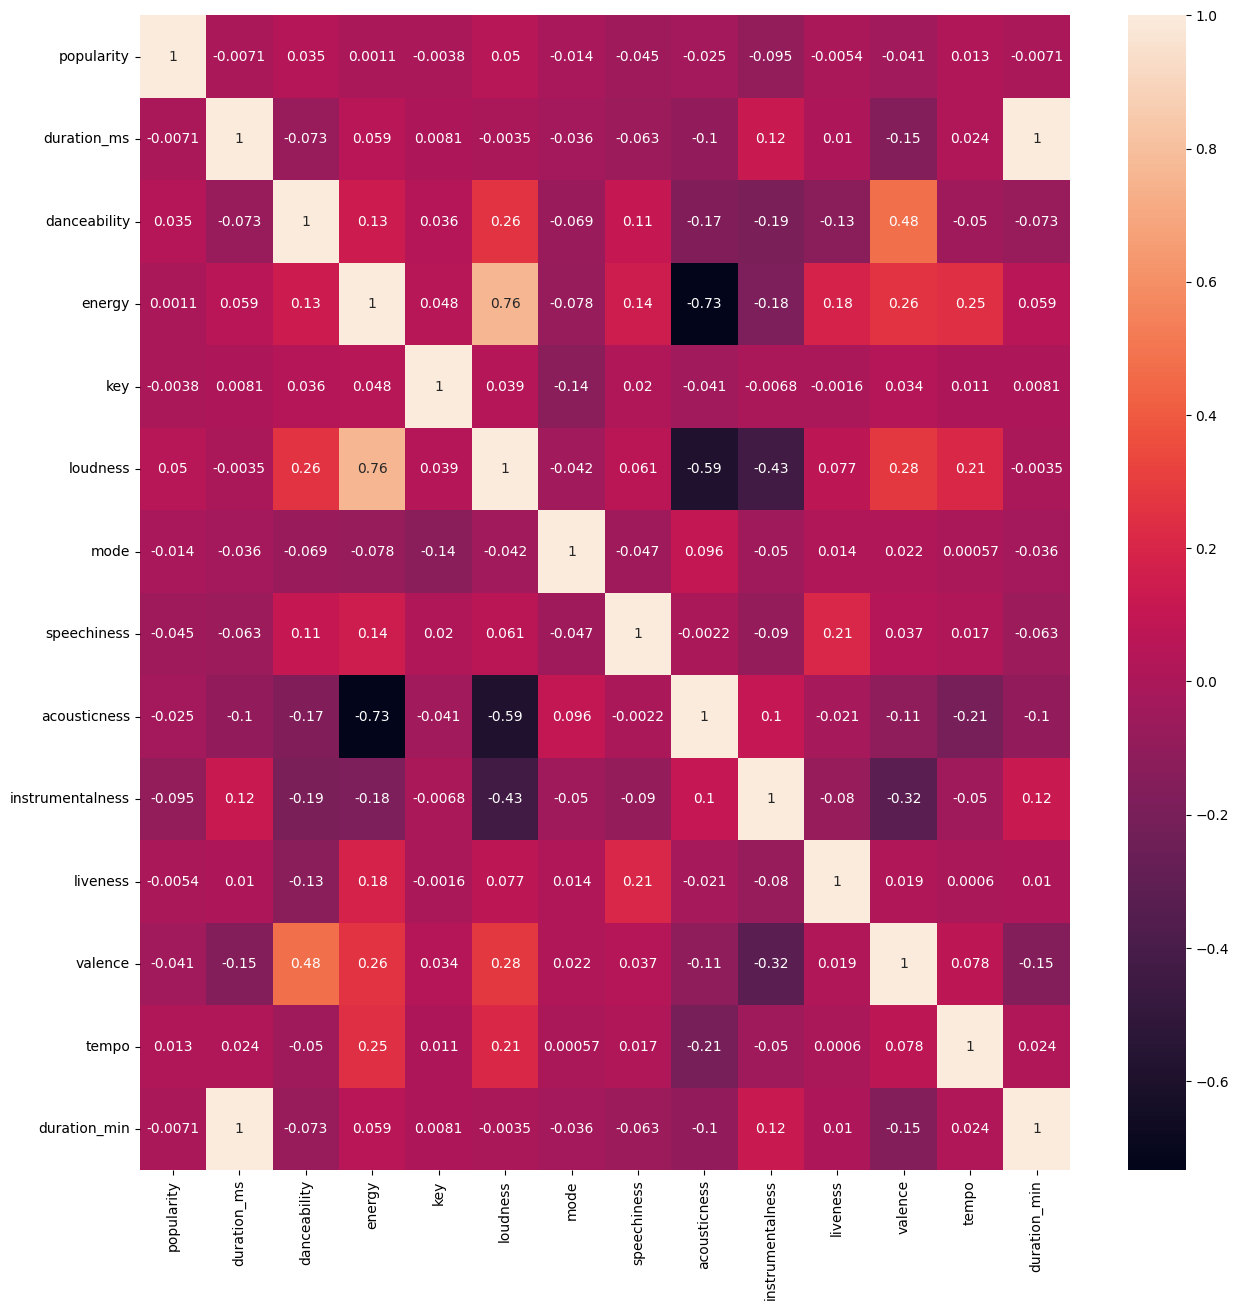

In [26]:
plt.figure(figsize = (15, 15))
sns.heatmap(df2, annot = True)

# Корреляция колонок с таргетом

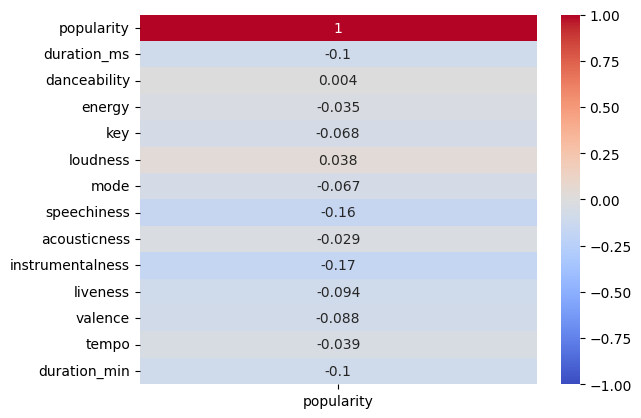

In [27]:
sns.heatmap(df2.corr()[['popularity']], vmin=-1, vmax=+1, annot=True, cmap="coolwarm")
plt.show()

# Feature Engineering

Корреляции я выявил, но они все очень "размазаны" по дата сету. Хочу создать параметр, который бы имел более значимуб корреляцию с таргетом
Например можно добавить количсество треков этого исполнителя на площадке. 
Потенциальная популярность треков будет выше, если у тебя уже на площадке много произведений (многие уже згакомы с творчеством)

In [28]:
# Подсчет количества треков для каждого исполнителя
track_counts = df['artists'].value_counts().reset_index()
track_counts.columns = ['artists', 'Track_num']

# Объединение данных с количеством треков
df = df.merge(track_counts, on='artists', how='left')

# Вывод первых строк данных для проверки
df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,duration_min,Track_num
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic,3.844433,10
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic,2.493500,13
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic,3.513767,1
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic,3.365550,15
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic,3.314217,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,world-music,6.416650,4
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,world-music,6.416667,4
113996,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,world-music,4.524433,14
113997,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,world-music,4.731550,30


Проверю корреляцию

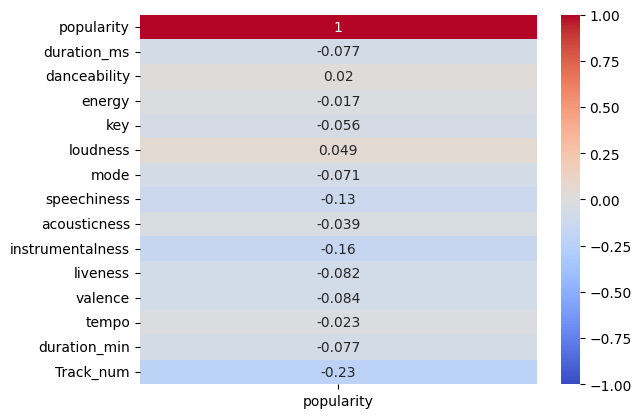

In [29]:
df3 = df.select_dtypes(include = 'number').corr()
sns.heatmap(df3.corr()[['popularity']], vmin=-1, vmax=+1, annot=True, cmap="coolwarm")
plt.show()

Моя колонка довольно сильно коррелирует с популярностью.

Так же хочу распределить колоку loudness по группам: 
1 - тихая композиция
2 - нормальная громкость
3 - громкий трек

In [30]:
bins = [-float('inf'), -20, 0, float('inf')]
labels = [1, 2, 3]

# Создание новой колонки с группами громкости
df['loudness_group'] = pd.cut(df['loudness'], bins=bins, labels=labels).astype(int)

# Вывод первых строк данных для проверки
df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,duration_min,Track_num,loudness_group
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic,3.844433,10,2
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic,2.493500,13,2
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic,3.513767,1,2
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic,3.365550,15,2
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic,3.314217,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,world-music,6.416650,4,2
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,world-music,6.416667,4,2
113996,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,world-music,4.524433,14,2
113997,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,world-music,4.731550,30,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             11

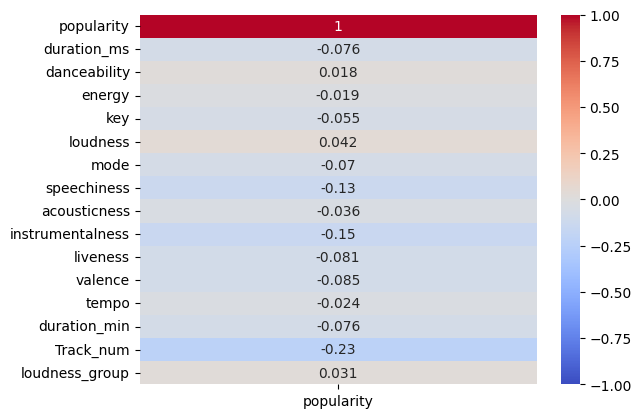

In [32]:
df3 = df.select_dtypes(include = 'number').corr()
sns.heatmap(df3.corr()[['popularity']], vmin=-1, vmax=+1, annot=True, cmap="coolwarm")
plt.show()

<Axes: >

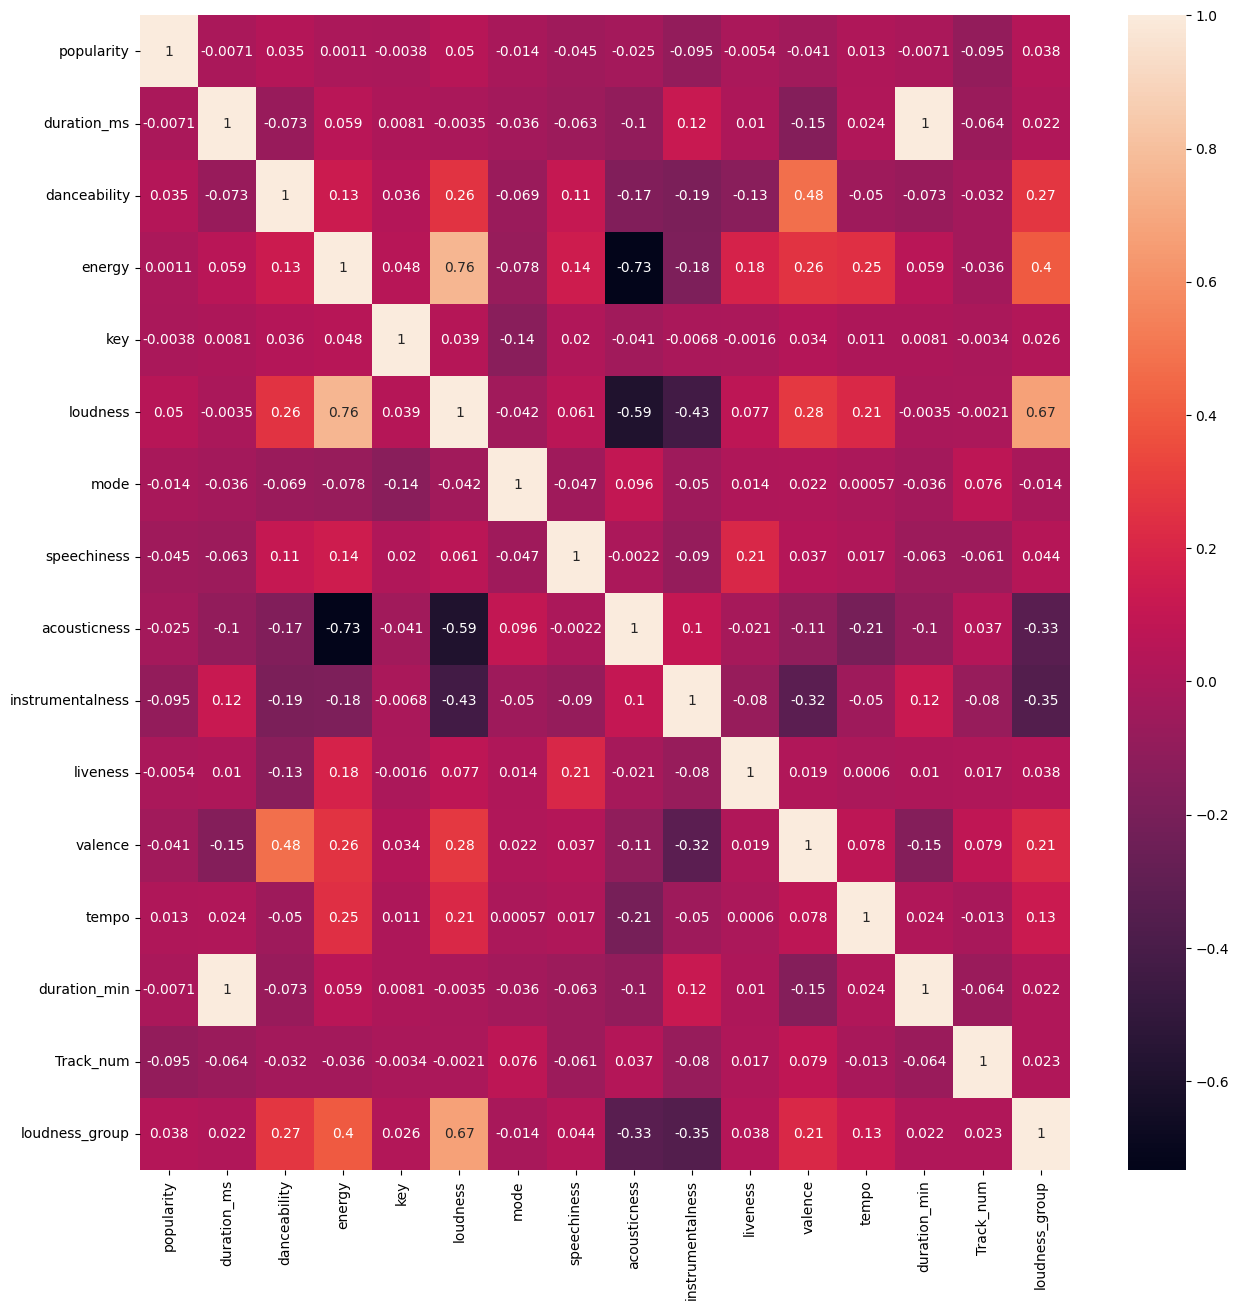

In [50]:
plt.figure(figsize = (15, 15))
sns.heatmap(df3, annot = True)

корреляция ствла ещё ниже - неудачный пример feature engeneering

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(df2, annot = True)

# ВЕКТОРИЗАЦИЯ И ПОДГОТОВКА ДАННЫХ

In [33]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             11

Уберу колонки, которуе меня не интересуют (которые не влияют на популярность или влияют слишком слабо)

In [34]:
data.drop('track_name', axis=1, inplace=True)
data.drop('album_name', axis=1, inplace=True)
data

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,duration_min,Track_num,loudness_group
0,Gen Hoshino,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic,3.844433,10,2
1,Ben Woodward,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic,2.493500,13,2
2,Ingrid Michaelson;ZAYN,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic,3.513767,1,2
3,Kina Grannis,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic,3.365550,15,2
4,Chord Overstreet,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic,3.314217,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,Rainy Lullaby,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,world-music,6.416650,4,2
113995,Rainy Lullaby,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,world-music,6.416667,4,2
113996,Cesária Evora,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,world-music,4.524433,14,2
113997,Michael W. Smith,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,world-music,4.731550,30,2


In [47]:
from sklearn.preprocessing import RobustScaler
numerical_features = ['duration_min', 'explicit', 'danceability', 'energy', 'loudness_group',
                      'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                      'tempo',]# числовые признаки

categorical_features = ['artists', 'track_genre'] # категориальные признаки
#Нормализую числовые признаки

scaler = RobustScaler()



scaled_features = scaler.fit_transform(data[numerical_features])

#Категориальные
data['artists'] = LabelEncoder().fit_transform(data['artists'])
data['track_genre'] = LabelEncoder().fit_transform(data['track_genre'])

normalized_data = data.copy()
for i, col in enumerate(numerical_features):
    normalized_data[col] = scaled_features[:,i]
    

normalized_data

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,duration_min,Track_num,loudness_group
0,10357,73,230666,0.0,0.401674,-0.586387,1,-6.746,0,1.936214,-0.235618,-0.000828,1.291429,0.593381,-0.834710,0,0.203111,10,0.0
1,3287,55,149610,0.0,-0.669456,-1.358639,1,-17.235,1,0.563786,1.300379,-0.000736,-0.177143,-0.465721,-1.089970,0,-0.723879,13,0.0
2,12397,57,210826,0.0,-0.594142,-0.853403,0,-9.734,1,0.139918,0.070617,-0.000849,-0.085714,-0.813239,-1.118291,0,-0.023788,1,0.0
3,14839,71,201933,0.0,-1.313808,-1.637173,0,-18.515,1,-0.259259,1.267654,0.000594,0.000000,-0.758865,1.461918,0,-0.125492,15,0.0
4,5255,82,198853,0.0,0.158996,-0.633508,2,-9.681,1,0.076132,0.516707,-0.000849,-0.280571,-0.702128,-0.050621,0,-0.160716,11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22486,21,384999,0.0,-1.707113,-1.178010,5,-16.393,1,-0.137860,0.811230,18.937927,-0.261143,-1.016785,0.097375,113,1.968127,4,0.0
113995,22486,22,385000,0.0,-1.698745,-1.486911,0,-18.318,0,-0.181070,1.420944,19.917518,-0.154286,-1.014184,-0.900263,113,1.968138,4,0.0
113996,4952,22,271466,0.0,0.205021,-0.931937,0,-10.895,0,-0.141975,1.202205,-0.000849,-0.274857,0.659574,0.253620,113,0.669716,14,0.0
113997,18534,41,283893,0.0,0.029289,-0.468586,7,-10.889,1,-0.395062,0.365140,-0.000849,0.788571,-0.120567,0.341301,113,0.811837,30,0.0


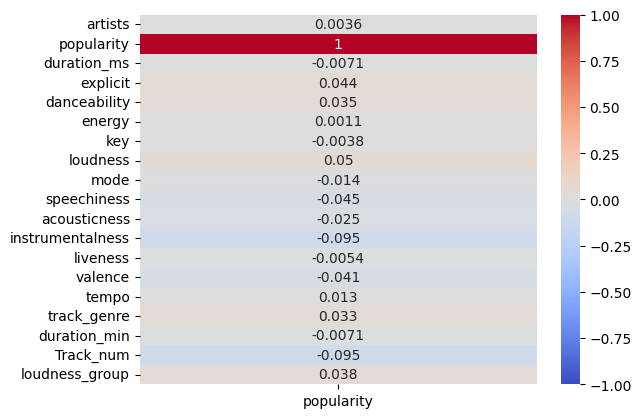

In [49]:
normalized_data.corr()
sns.heatmap(normalized_data.corr()[['popularity']], vmin=-1, vmax=+1, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Разделение данных на признаки и целевую переменную
X = normalized_data.drop('popularity', axis=1)
y = normalized_data['popularity']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Вычисление перестановочной важности признаков
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Визуализация важности признаков
importances = result.importances_mean
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()

Делаю выборки для обучения и тестов

In [71]:

numerical_features = ['duration_min', 'explicit', 'danceability', 'energy', 'loudness_group',
                      'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                      'tempo','Track_num']

X = df[numerical_features]
y = df['popularity']  

# Обучение моделей

Простая

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания
predictions = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Squared Error: 480.2631
Mean Absolute Error: 18.2646
R² Score: 0.0319
Root Mean Squared Error: 21.9149


**Lasso**

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

L1 = Lasso(alpha=0.1, random_state=42)
L1.fit(X_train, y_train)

# Предсказания
predictions = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Squared Error: 480.2631
Mean Absolute Error: 18.2646
R² Score: 0.0319
Root Mean Squared Error: 21.9149


**Random Forest**

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

# Предсказания
predictions = RF.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Squared Error: 213.3951
Mean Absolute Error: 10.2062
R² Score: 0.5698
Root Mean Squared Error: 14.6080


**XGBRegressor**

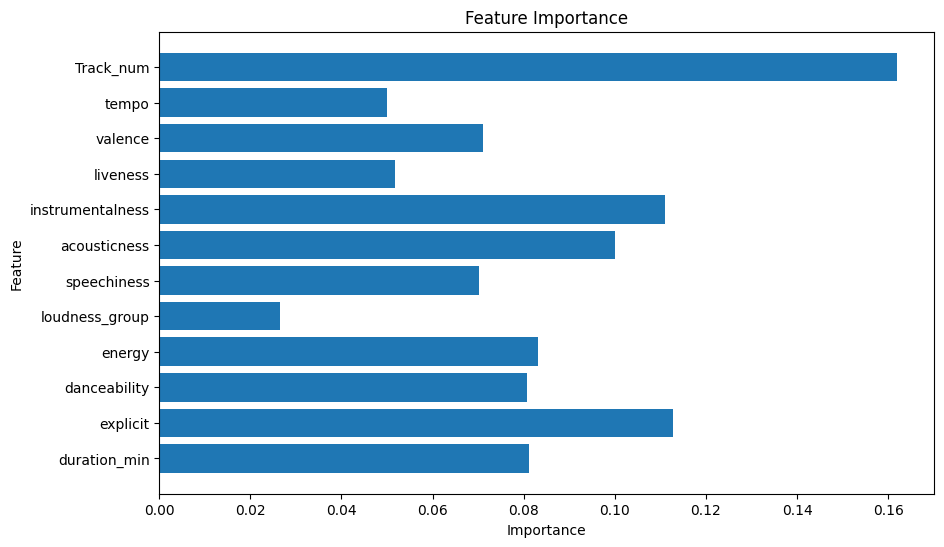

Mean Squared Error: 380.2509
Mean Absolute Error: 15.5856
R² Score: 0.2335
Root Mean Squared Error: 19.5000


In [76]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Обучение модели XGBoost
XR = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
XR.fit(X_train, y_train)

# Предсказания
predictions = XR.predict(X_test)

importances = XR.feature_importances_

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Оценка модели
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Нейронная сеть

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание нейронной сети
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Предсказания
predictions = model.predict(X_test_scaled)



Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2565/2565 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 633.0820 - val_loss: 463.2322
Epoch 2/20
2565/2565 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 464.9363 - val_loss: 453.8288
Epoch 3/20
2565/2565 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 453.5669 - val_loss: 448.9489
Epoch 4/20
2565/2565 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 446.4179 - val_loss: 445.7231
Epoch 5/20
2565/2565 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 445.0678 - val_loss: 442.6980
Epoch 6/20
2565/2565 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 439.1431 - val_loss: 439.9102
Epoch 7/20
2565/2565 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 440.8151 - val_loss: 438.3606
Epoch 8/20
2565/2565 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 436.1462 - val_loss: 442.3057
Epoch 9/20
2565/2565 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 437.7396 - val_loss: 436.0775
Epoch 10/20
2565/2565 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 437.2516 - val_loss: 435.0191
Epoch 11/20
2565/2565 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 432.5992 - val_loss: 439.31

In [78]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Squared Error: 430.8574
Mean Absolute Error: 16.7903
R² Score: 0.1315
Root Mean Squared Error: 20.7571


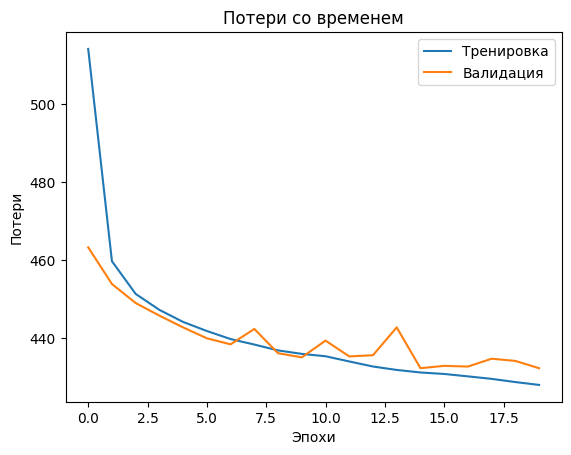

In [80]:
plt.plot(history.history['loss'], label='Тренировка')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('Потери со временем')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Кроссвалидация

In [64]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

scores = cross_val_score(RF, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Преобразование отрицательных значений MSE в положительные
mse_scores = -scores

# Вывод результатов
print(f"Mean Squared Error (MSE) scores: {mse_scores}")
print(f"Mean MSE: {mse_scores.mean():.4f}")
print(f"Standard Deviation of MSE: {mse_scores.std():.4f}")

Mean Squared Error (MSE) scores: [247.79232264 250.18318904 246.9248845  250.71245525 247.63006786]
Mean MSE: 248.6486
Standard Deviation of MSE: 1.5071
